# `pooling` Instance

## Constructing Model CZ method

In [ ]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from pyomo.environ import SolverFactory
from pyomo.environ import value
# create StochasticModel instance
sto_m = const_model()

# create CaoZavalaModel instance from sto_m
m = CaoZavalaModel.from_sto_m(sto_m)
# build the model
m.build()

# declare binary first-stage variables
binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']

binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['lambd[1]'] = 1
binary_y_val['lambd[2]'] = 1
binary_y_val['lambd[5]'] = 1
binary_y_val['theta[1]'] = 1
binary_y_val['theta[4]'] = 1
m.fix_binary_y(binary_y_val)

pooling_obj=-1338.2471283376406
pooling_sol = {
    'A[1]': 300.0, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
    'S[1]': 247.10232558139526, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
}

pooling_y_bound = {
    'A[1]': [0, 300], 'A[2]': [0, 250], 'A[3]': [0, 0], 'A[4]': [0, 0], 'A[5]': [0, 300],
    'S[1]': [0, 400], 'S[2]': [0, 0], 'S[3]': [0, 0], 'S[4]': [0, 500]
}


from pyomo.environ import Constraint
def total_y_equals_100_rule(model):
    pooling_sol = {}
    pooling_sol['A[1]'] = 300.0
    pooling_sol['A[2]'] = 201.92127476313524
    pooling_sol['A[3]'] = 0.0
    pooling_sol['A[4]'] = 0.0
    pooling_sol['A[5]'] = 245.18105081826008
    pooling_sol['S[1]'] = 247.10232558139526
    pooling_sol['S[2]'] = 0.0
    pooling_sol['S[3]'] = 0.0
    pooling_sol['S[4]'] = 500.0
    return sum((model.y[i]-pooling_sol[i])**2 for i in pooling_sol) == 1

m.origin_model.total_y_equals_100 = Constraint(rule=total_y_equals_100_rule)

# alg = CaoZavalaAlgo(m, solver='baron')
# alg.solve(max_iter=1e8, max_time=3600*24, tol=1e-3,ubd_midpt_fix=0,ubd_local_solve=0,ubd_provided=-1338.2471283376406)
solver = SolverFactory('baron')
results=solver.solve(m.origin_model, tee=True)




Solving the problem via SBB...
	Maximum iteration: 100000000.0
	Maximum time: 86400
	Tolerance: 1E-03
Initialize the model...
	Root node lower bound: -1616.40, upper bound: -1338.25
	Total initialization CPU time: 0.82 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         2.34         3.27   -1605.7662   -1338.2471   19.9903%
         2         2.61         4.58   -1605.7662   -1338.2471   19.9903%
         3         2.80         5.88   -1605.7662   -1338.2471   19.9903%
         4         3.30         7.35   -1605.7662   -1338.2471   19.9903%
         5         3.50         8.66   -1600.1083   -1338.2471   19.5675%
         6         3.82        10.79   -1561.4949   -1338.2471   16.6821%
         7         3.99        12.17   -1555.2371   -1338.2471   16.2145%
         8         4.22        13.78   -1529.9571   -1338.2471   14.3255%
         9         4.47        15.10   -1528.1616   -1338.2471   14.1913%
        10    

KeyboardInterrupt: 

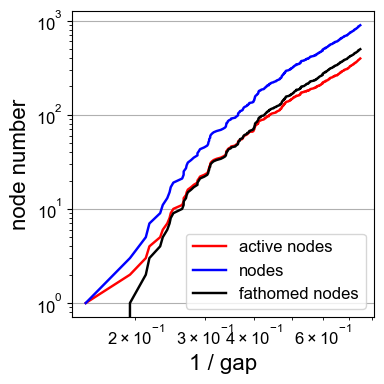

In [8]:
alg.res.plot_bb_n_gap(plot_method="loglog")

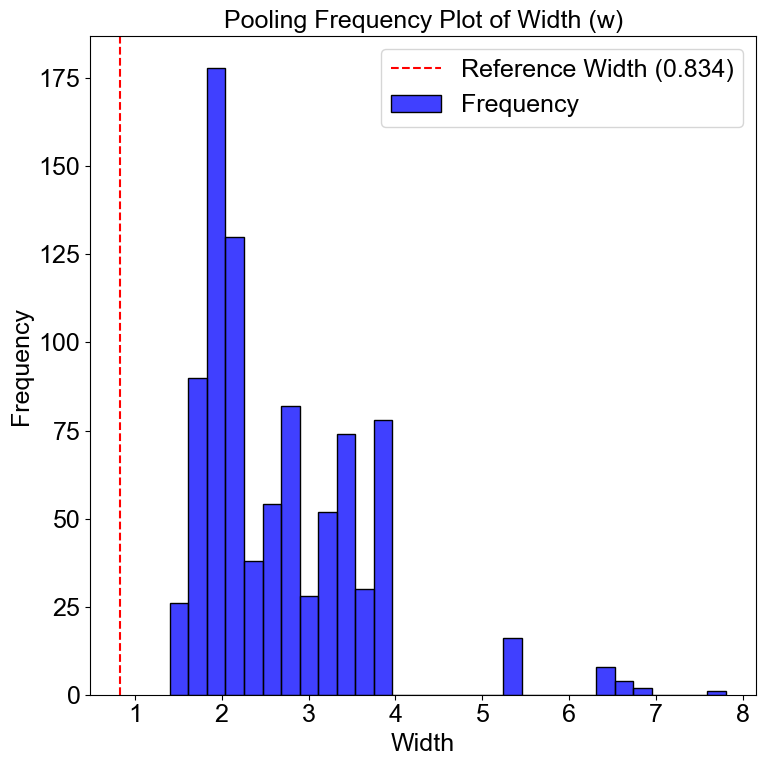

In [7]:
import seaborn as sns

sns.histplot(w, bins=30, kde=False, color='blue', label='Frequency')
plt.axvline(0.834, color='red', linestyle='dashed', linewidth=1.5, label='Reference Width (0.834)')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Pooling Frequency Plot of Width (w)')
plt.legend()
plt.show()

In [9]:
import matplotlib.pyplot as plt
plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-8-8', 'fontsize']])
w=[]
for i in range(0,891):
    a=alg.node_list.nodes[i].bound
    w.append(sum([(i[1]-i[0])**2 for i in a.values()])**0.5)
n = len(w)
vector_of_ones = [0.834] * n
plt.plot(w,label='Width')
plt.plot(vector_of_ones,label='Critical Width')
plt.xlabel('Node Index')
plt.ylabel('Width')
plt.legend()
plt.title('Pooling Width vs Node Index')

KeyError: 221

In [14]:
import pickle
sol=-1338.2471283376394
# Load the object from the file
with open('pooling.pickle', 'rb') as file:
    loaded_alg = pickle.load(file)
counter=0
for i in loaded_alg.lbds:
    if abs((sol-i)/sol)<0.03:
        counter+=1
counter/len(loaded_alg.lbds)

0.9510127178520961

In [2]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo

# create StochasticModel instance
sto_m = const_model()

# create CaoZavalaModel instance from sto_m
m = CaoZavalaModel.from_sto_m(sto_m)
# build the model
m.build()

# declare binary first-stage variables
binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']

binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['lambd[1]'] = 1
binary_y_val['lambd[2]'] = 1
binary_y_val['lambd[5]'] = 1
binary_y_val['theta[1]'] = 1
binary_y_val['theta[4]'] = 1

# fix binary y's
m.fix_binary_y(binary_y_val)
alg = CaoZavalaAlgo(m, solver='baron')
# SBB solve

alg.solve(max_iter=1e5, max_time=3600*8, tol=1e-2)
alg.node_list.node_idx+1


Building models...
Done.
Solving the problem via SBB...
	Maximum iteration: 100000.0
	Maximum time: 28800
	Tolerance: 1E-02
Initialize the model...
	Root node lower bound: -1616.40, upper bound: 1260.00
	Total initialization CPU time: 0.54 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         0.94         1.04     -1605.77      1260.00   286576.6%
         2         1.21         1.37     -1605.77      1260.00   286576.6%
         3         1.43         1.66     -1605.77      1260.00   286576.6%
         4         1.71         2.00     -1605.77      1260.00   286576.6%
         5         1.93         2.28     -1600.11      1260.00   286010.8%
         6         2.14         2.56     -1561.49      1260.00   282149.5%
         7         2.36         2.84     -1555.24      1260.00   281523.7%
         8         2.57         3.11     -1529.96      1260.00   278995.7%
         9         2.78         3.38     -1528.16      1260

KeyboardInterrupt: 

## LG method

In [1]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
from src.models.lagrangean_model import LagrangeanAlgo, LagrangeanModel

# create StochasticModel instance
sto_m = const_model()

# create CaoZavalaModel instance from sto_m
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
# declare binary first-stage variables
binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']

binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['lambd[1]'] = 1
binary_y_val['lambd[2]'] = 1
binary_y_val['lambd[5]'] = 1
binary_y_val['theta[1]'] = 1
binary_y_val['theta[4]'] = 1

# fix binary y's
m.fix_binary_y(binary_y_val)
alg = LagrangeanAlgo(m, solver='baron')
# SBB solve
alg.solve(max_iter=1e3, max_time=3600*8, tol=1e-4)

Building models...
Done.
Solving the problem via SBB...
	Maximum iteration: 1000.0
	Maximum time: 28800
	Tolerance: 1E-04
Initialize the model...
	Root node lower bound: -1616.40, upper bound: -593.24
	Total initialization CPU time: 1.16 s
Done.
Solving the model...
  iteration     CPU time    wall time  lower bound  upper bound     gap
         1         3.51         4.33     -1605.77      -593.24    170.7%
         2        11.09        12.42     -1605.77      -593.24    170.7%
         3        12.83        14.68     -1605.77      -691.89    132.1%
         4        15.34        17.72     -1605.77      -905.06     77.4%
         5        19.24        22.15     -1600.11     -1147.82     39.4%
         6        22.06        25.49     -1561.49     -1162.69     34.3%
         7        24.74        28.70     -1555.24     -1162.69     33.8%
         8        27.53        32.03     -1529.96     -1162.69     31.6%
         9        30.41        35.49     -1528.16     -1232.78     24.0%
    

In [27]:
# final results
alg.res.sol

{}

In [4]:
x = alg.res.sol
gap = abs(x['final_lbd'] - x['final_ubd']) / abs(max(x['final_lbd'], x['final_ubd']))
gap * 100

3.008097207425432

## bb node vs. gap plot

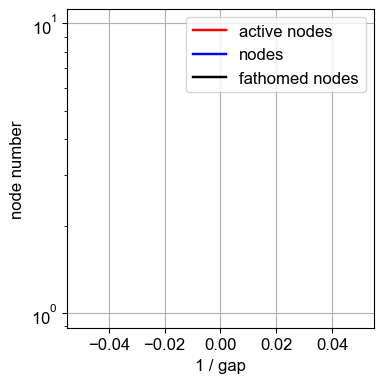

In [26]:
alg.res.plot_bb_n_gap('semilogy')

## estimate L value

In [18]:
# basic idea: value function grid search

from src.analyses.value_function import ValueFunction

v_f = ValueFunction(m, solver='gurobi')

A_set = range(1, 6)
S_set = range(1, 5)
y_val = {f'A[{i}]': 0. for i in A_set}
y_val.update({f'S[{i}]': 0. for i in S_set})
y_val['A[1]'] = 300.
y_val['A[2]'] = 201.92127476313522
y_val['A[5]'] = 245.18105081826047
y_val['S[1]'] = 247.10232558139558
y_val['S[4]'] = 500.

idx_1 = 'A[1]'
idx_2 = 'S[4]'

val_1 = y_val[idx_1]
val_2 = y_val[idx_2]

eps = 1

interval_1 = (val_1 -  1* eps, val_1)
interval_2 = (val_2 - 1 * eps, val_2)

In [19]:
y_bound = {f'A[{i}]': [0, 300] for i in A_set}
y_bound.update({f'S[{i}]': [0, 500] for i in S_set})

In [8]:
y_idx = y_val.keys()

intervals = {y: [max(y_val[y] - 1, y_bound[y][0]), min(y_val[y] + 1, y_bound[y][1])] for y in y_idx}

_idx = ['A[2]', 'A[5]', 'S[1]']
for _i in _idx:
    intervals[_i].append(y_val[_i])
intervals

{'A[1]': [299.0, 300],
 'A[2]': [200.92127476313522, 202.92127476313522, 201.92127476313522],
 'A[3]': [0, 1.0],
 'A[4]': [0, 1.0],
 'A[5]': [244.18105081826047, 246.18105081826047, 245.18105081826047],
 'S[1]': [246.10232558139558, 248.10232558139558, 247.10232558139558],
 'S[2]': [0, 1.0],
 'S[3]': [0, 1.0],
 'S[4]': [499.0, 500]}

In [9]:
import itertools

y_points = []
for val in itertools.product(*intervals.values()):
    _d = {}
    for i, y in enumerate(y_idx):
        _d[y] = val[i]
    y_points.append(_d)

len(y_points)

1728

In [10]:
def calc_y_diff(y1, y2):
    res = 0
    for y in y1:
        s = abs(y1[y] - y2[y])
        res += s

    return res

In [11]:
y_diffs = []

for _y in y_points:
    y_diffs.append(calc_y_diff(y_val, _y))

In [12]:
res = []

In [13]:
def filter_infty(n: float):
    """
    Return infinity if n is greater than 1e20. Sometimes barron returns 1e51 or
    2e51 for upper bound.
    """

    return n if n < 1e20 else float("inf")

In [14]:
size = len(y_diffs)
l = len(str(size))
print(" " * l * 2 + "  points have been estimated...", end="\r")

# iterate through each point
for i in range(size):

    print(f"{i + 1:>{l}}/{size}", end="\r")

    _y_val = y_points[i]

    tmp_res = 0

    # solve all subproblems
    for s in v_f.model.scenarios:

        model = v_f.model.aux_models['lbd'][s]

        # update y_val_fix to model
        for y_idx in y_val:
            model.y[y_idx].fix(_y_val[y_idx])

        # solve the model
        results = v_f.solver.solve(model)

        tmp_res += filter_infty(results.problem[0]['Upper bound'])

    # print(tmp_res)
    res.append(tmp_res)

KeyboardInterrupt: 

In [ ]:
len(res), len(y_diffs)

(1728, 1728)

In [ ]:
v_val = -1.338247128338e+03
modified_unit_res = [(r - v_val)/y_diffs[i] if y_diffs[i] > 0 else 0 for i, r in enumerate(res[:1728])]
sorted(modified_unit_res)

[0,
 0.1359380576757303,
 0.1500798092658897,
 0.15640384624430226,
 0.15673101699417202,
 0.1634615386428777,
 0.1778846179502125,
 0.20576923094995436,
 0.2135634872691412,
 0.22200021728182642,
 0.22905128217128853,
 0.23140384624446142,
 0.2402461539185879,
 0.26004516241118836,
 0.267263313422139,
 0.2806546280252178,
 0.28375760713515774,
 0.2859738667384136,
 0.32200000011971497,
 0.33300000009063524,
 0.33458650600656864,
 0.3380256411461839,
 0.3446666667861488,
 0.3446752873145063,
 0.35944976465191303,
 0.366753545536767,
 0.3676487555563502,
 0.37297072634510187,
 0.3782708481755132,
 0.3864493290122937,
 0.3974230790759634,
 0.40583242473257997,
 0.43802564114578973,
 0.44165373236637606,
 0.4491244881637158,
 0.45000000174042043,
 0.4764269122766412,
 0.4783709646104626,
 0.5008684805278563,
 0.5077682785548253,
 0.5237991922763285,
 0.5382545792767814,
 0.5493098920217866,
 0.5797522678600823,
 0.5830000001797089,
 0.6128205151409626,
 0.6220488162864513,
 0.628568188589

## bb node vs. gap plot + compare with theory

In [ ]:
from math import ceil, sqrt, comb

def find_m(r, delta):
    for m in range(2, 18 + 1):
        if delta >= 2 * r / sqrt(m) and delta < 2 * r / sqrt(m - 1):
            print(m)
            return m
    raise ValueError

def max_node_number(eps, n, lambda_1, beta, K):
    """Estimate the number of nodes needed.
    Source: 2014 Wechsung Schaber Barton

    Args:
        eps (float): termination tolerance
        n (int): The problem dimension
        lambda_1 (float): the smallest eigenvalue of the second-order derivative of f at the optimizer.
        beta (int): The Hausdorff convergence order.
        K (float): The prefactor
    """

    r = sqrt(2 * lambda_1 / eps)
    delta = (eps / K) ** (1 / beta)
    print(f"r: {r:.2e}, delta: {delta:.2e}")

    if delta >= 2 * r:
        return 1
    elif delta < 2 * r / (18 - 1) ** 0.5 and delta >= 2 * r / sqrt(2):
        m = find_m(r, delta)
        return sum([2 ** i * comb(n, i) for i in range(m)]) + 2 * n * ceil((m - 9) / 9)
    else:
        term_1 = ceil(2 * K ** (1 / beta) * eps ** (0.5 - 1 / beta) * lambda_1 ** (- 0.5))
        term_2 = ceil((2 ** 0.5 - 1) * K ** (1 / beta) * eps ** (0.5 - 1 / beta) * lambda_1 ** (- 0.5))
        return term_1 ** (n - 1) * (term_1 + 2 * n * term_2)

In [ ]:
def find_m_nonsmooth(r, delta, n):
    for m in range(2, min(6, n) + 1):
        if delta >= 2 * r / m and delta < 2 * r / (m - 1):
            return m
    raise ValueError

def max_node_number_nonsmooth(eps, n, L, beta, K):
    """Estimate the number of nodes needed.
    Source: 2014 Wechsung thesis

    Args:
        eps (float): termination tolerance
        n (int): The problem dimension
        L (float): ...
        beta (int): The Hausdorff convergence order.
        K (float): The prefactor
    """

    r = eps / L
    delta = (eps / K) ** (1 / beta)
    # print(f"r: {r:.2e}, delta: {delta:.2e}")

    if delta >= 2 * r:
        return 1
    elif delta < 2 * r / (min(6, n) - 1) and delta >= 2 * r / 2:
        m = find_m_nonsmooth(r, delta, n)
        return sum([2 ** i * comb(n, i) for i in range(m)]) + 2 * n * ceil((m - 3) / 3)
    else:
        _term = K ** (1 / beta) * eps ** (1 - 1 / beta) * L ** (-1)
        return ceil(_term) ** (n - 1) * (ceil(_term) + 2 * n * ceil(0.5 * _term))

In [ ]:
def max_node_number_pooling_0(eps):
    K = 2.7
    beta = 1
    # L = 7.934747844728918e-05
    L = 0.04281538468753752
    n = 5

    return max_node_number_nonsmooth(eps, n, L, beta, K)

import numpy as np

max_node_number_pooling = np.vectorize(max_node_number_pooling_0)

/var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/ipykernel_90941/2698860521.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('node_compare.png', dpi=300, bbox_inches="tight")
/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


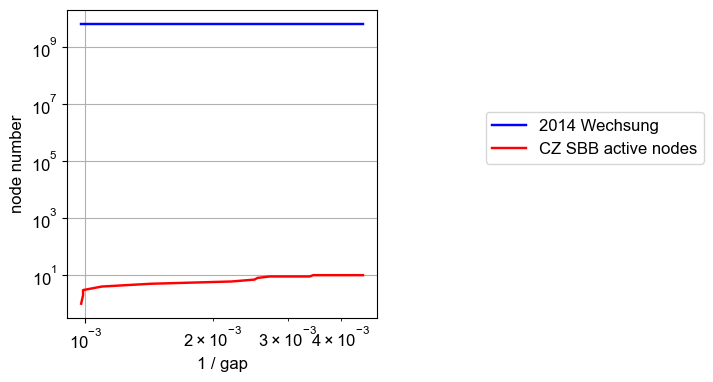

In [ ]:
import matplotlib.pyplot as plt

fathomed_node_n = [i - j for (i, j) in zip(alg.res.bb_n, alg.res.active_bb_n)]
gap_rec = [1 / g for g in alg.res.abs_gaps]
gap_rec_inv = [g for g in alg.res.abs_gaps]

plt.style.use(['./src/utility/' + i + '.mplstyle' for i in ['font-sans', 'size-4-4', 'fontsize-12']])

func = plt.loglog
lw = 1.75
func(gap_rec, max_node_number_pooling(gap_rec_inv), 'b-', label='2014 Wechsung', linewidth=lw)
func(gap_rec, alg.res.active_bb_n, 'r-', label='CZ SBB active nodes', linewidth=lw)
# func(gap_rec, alg.res.bb_n, 'b-', label='nodes', linewidth=lw)
# func(gap_rec, fathomed_node_n, 'k-', label='fathomed nodes', linewidth=lw)
plt.xlabel('1 / gap')
plt.ylabel('node number')
plt.grid(True, which='major', axis='both')

plt.legend(loc=(1.35, 0.5))
# plt.legend()

plt.savefig('node_compare.png', dpi=300, bbox_inches="tight")

## Value function vis + contour

In [ ]:
alg.res.__dir__()

['ubds',
 'lbds',
 'rel_gaps',
 'abs_gaps',
 'acc_cpu_time',
 'acc_wall_time',
 'cpu_time',
 'wall_time',
 'status',
 'bb_n',
 'active_bb_n',
 '_sol',
 '__module__',
 '__doc__',
 '__init__',
 'add_lbd',
 'add_ubd',
 'get_gap',
 'last_lbd',
 'last_ubd',
 'add_node_n',
 'add_active_node_n',
 'add_rel_gap',
 'add_abs_gap',
 'add_cpu_time',
 'add_wall_time',
 'record_sol',
 'sol',
 'total_node_n',
 'plot_bb_n_gap',
 'save',
 '__dict__',
 '__weakref__',
 '__slotnames__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
alg.res.total_node_n

from pprint import pprint
pprint(vars(alg.res))

{'_sol': {'final_lbd': -1521.0940462222177,
          'final_ubd': -1299.754013008629,
          'sbb_node_n': 12,
          'time': {'bt': 0.0,
                   'lbd': 5.336744785308838,
                   'total': 9.903294324874878,
                   'ubd': 4.56654953956604},
          'y': {'A[1]': 262.5,
                'A[2]': 218.75,
                'A[3]': 0.0,
                'A[4]': 0.0,
                'A[5]': 225.0,
                'S[1]': 250.0,
                'S[2]': 0.0,
                'S[3]': 0.0,
                'S[4]': 437.5,
                'lambd[1]': 1,
                'lambd[2]': 1,
                'lambd[3]': 0,
                'lambd[4]': 0,
                'lambd[5]': 1,
                'theta[1]': 1,
                'theta[2]': 0,
                'theta[3]': 0,
                'theta[4]': 1}},
 'abs_gaps': [1023.1538859505407,
              1012.5233054010765,
              1012.5233053532207,
              913.8789604499605,
              700.703103843151

In [ ]:
bounds = []
for node in alg.node_list.nodes.values():

    bounds.append(node.bound)

Text(0, 0.5, 'dimension A[5]')

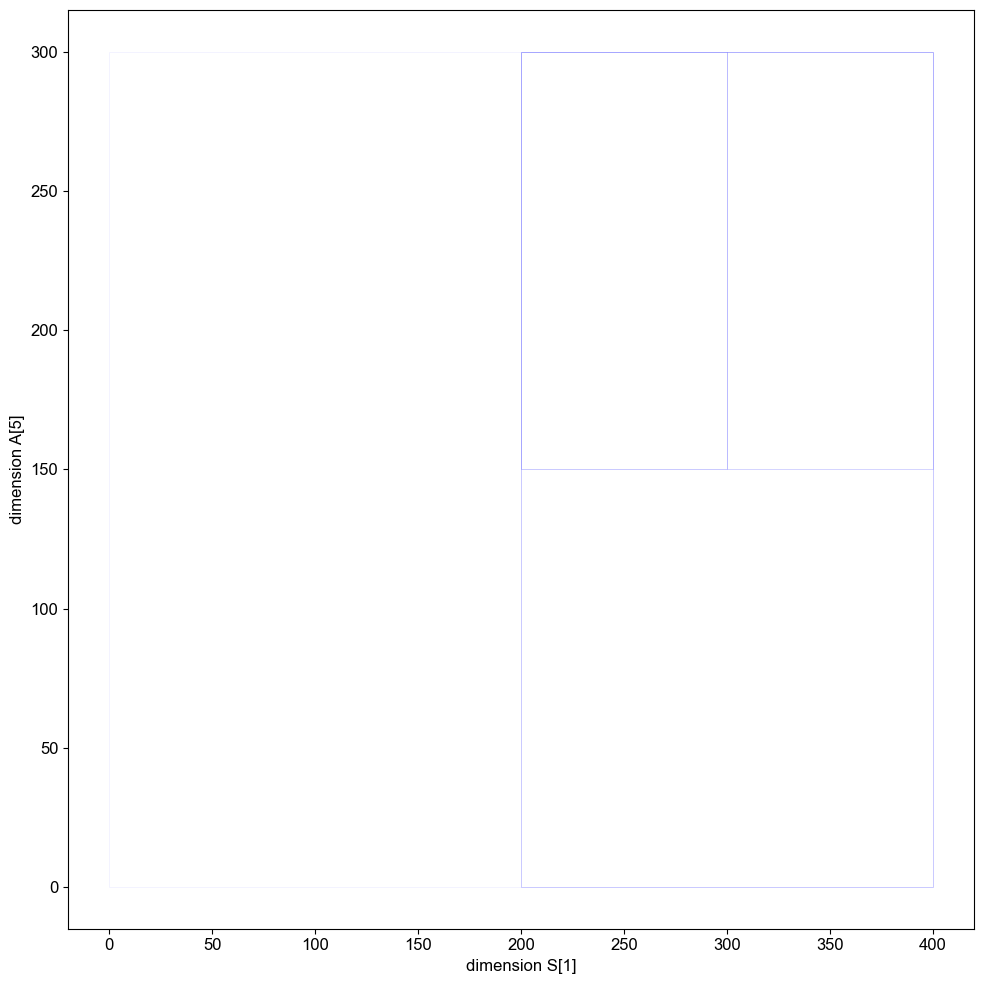

In [ ]:
import matplotlib.pyplot as plt

# plt.style.use('./src/utility/style.mplstyle')
_, ax = plt.subplots(figsize=(10, 10))

# get the largest box
root_node = alg.node_list.root.bound

idx_1 = 'S[1]'
idx_2 = 'A[5]'

# set up canvas
x_start, x_end = root_node[idx_1]
y_start, y_end = root_node[idx_2]
x_diff = x_end - x_start
y_diff = y_end - y_start
ax.set_xlim(x_start - 0.05 * x_diff, x_end + 0.05 * x_diff)
ax.set_ylim(y_start - 0.05 * y_diff, y_end + 0.05 * y_diff)

# plot each node as a rectangle
for bound in bounds:
    x_start, x_end = bound[idx_1]
    y_start, y_end = bound[idx_2]
    rectangle = plt.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, lw=0.5, ec="b", fc="none", alpha=0.03) # type: ignore
    ax.add_patch(rectangle)

ax.set_xlabel(f"dimension {idx_1}")
ax.set_ylabel(f"dimension {idx_2}")

In [26]:
from src.analyses.value_function import ValueFunction

v_f = ValueFunction(m, solver='baron')

/Users/jyang872/anaconda3/envs/pyomo/lib/python3.12/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.figure.savefig(buf, format='png', dpi='figure')


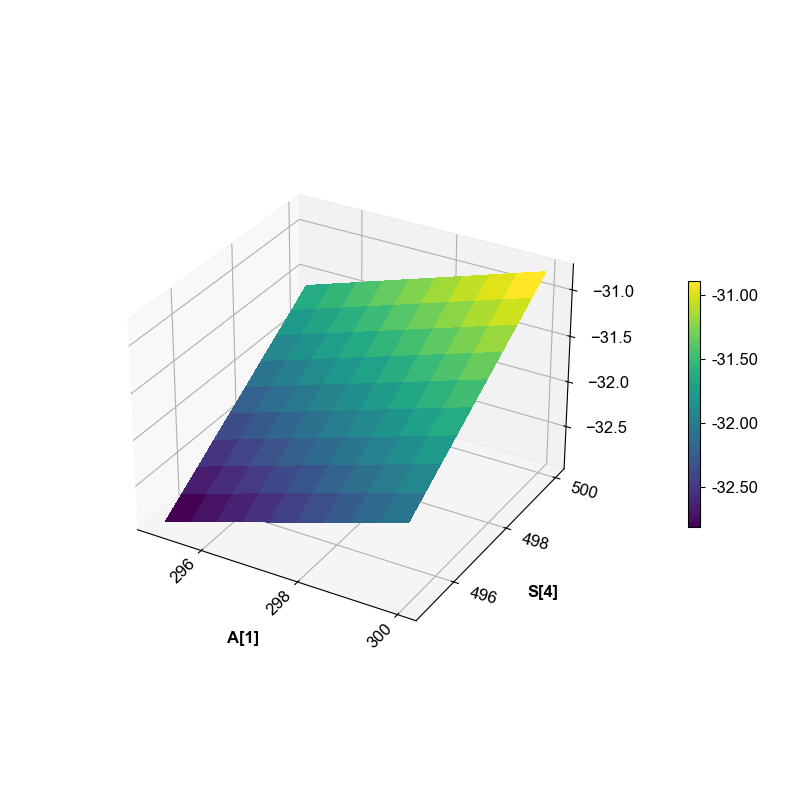

In [27]:
A_set = range(1, 6)
S_set = range(1, 5)
y_val = {f'A[{i}]': 0. for i in A_set}
y_val.update({f'S[{i}]': 0. for i in S_set})
y_val['A[1]'] = 300.
y_val['A[2]'] = 201.92127476313522
y_val['A[5]'] = 245.18105081826047
y_val['S[1]'] = 247.10232558139558
y_val['S[4]'] = 500.

idx_1 = 'A[1]'
idx_2 = 'S[4]'

val_1 = y_val[idx_1]
val_2 = y_val[idx_2]

eps = 5

interval_1 = (y_val[idx_1]-1*eps, y_val[idx_1])
interval_2 = (y_val[idx_2]-1*eps, y_val[idx_2])

v_f.calc_2D(idx_1, idx_2, y_val, interval_1=interval_1, interval_2=interval_2, step=10)
v_f.plot_2D(1)

In [5]:
%matplotlib widget

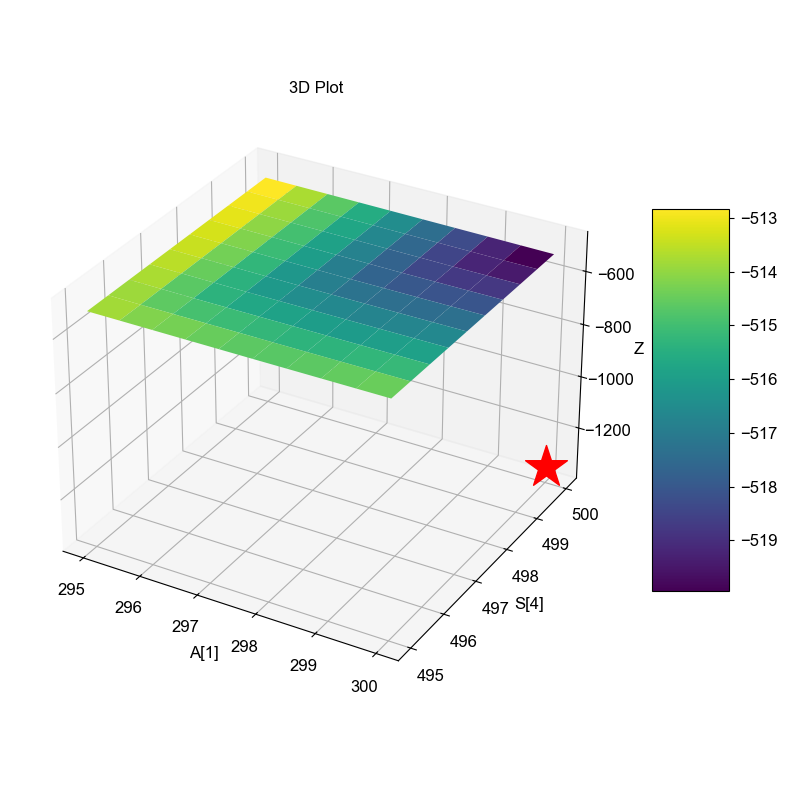

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(v_f.y_mesh[0], v_f.y_mesh[1], v_f.value_func[3], cmap='viridis')
fig.colorbar(surf,  ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel(idx_1)
ax.set_ylabel(idx_2)
ax.set_zlabel('Z')  # Replace 'Z' with the appropriate label
ax.scatter(y_val[idx_1], y_val[idx_2], -1.338207466630e+03, c='red', marker='*', s=1000)
plt.title('3D Plot')
plt.show()

Text(0, 0.5, 'dimension A[5]')

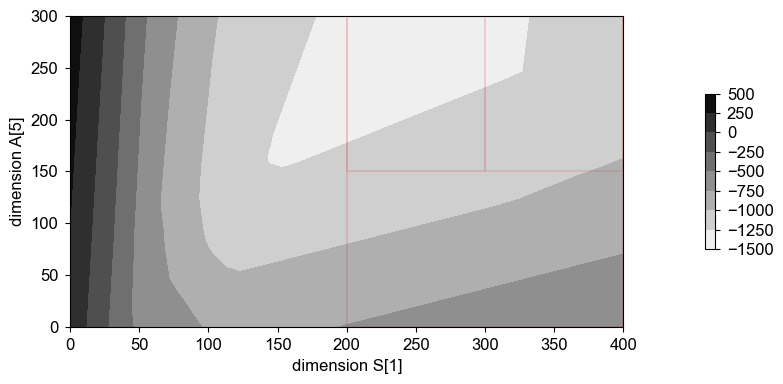

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colorbar
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(8, 4))

value_func = v_f.total_value_func

con = ax.contourf(v_f.y_mesh[0], v_f.y_mesh[1], value_func, cmap=cm.binary)

# ax.clabel(con, inline=True, fontsize=10)

# ax.set_xlabel(f"{self.idx_1}", loc='right')
# ax.set_ylabel(f"{self.idx_2}")

fig.colorbar(con, shrink=0.5, aspect=15, anchor=(0.5, 0.5))

# plt.style.use('./src/utility/style.mplstyle')
# _, ax = plt.subplots(figsize=(10, 10))

# get the largest box
root_node = alg.node_list.root.bound

idx_1 = 'S[1]'
idx_2 = 'A[5]'

# set up canvas
x_start, x_end = root_node[idx_1]
y_start, y_end = root_node[idx_2]
x_diff = x_end - x_start
y_diff = y_end - y_start
# ax.set_xlim(x_start - 0.05 * x_diff, x_end + 0.05 * x_diff)
# ax.set_ylim(y_start - 0.05 * y_diff, y_end + 0.05 * y_diff)

# plot each node as a rectangle
for bound in bounds:
    x_start, x_end = bound[idx_1]
    y_start, y_end = bound[idx_2]
    rectangle = plt.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, lw=1.5, ec="r", fc="none", alpha=0.01) # type: ignore
    ax.add_patch(rectangle)

ax.set_xlabel(f"dimension {idx_1}")
ax.set_ylabel(f"dimension {idx_2}")

In [ ]:
fig.savefig('cluster_contour.png', dpi=300, bbox_inches='tight')

## direct solve

In [11]:
from pyomo.environ import SolverFactory
ori_m = m.origin_model

opt = SolverFactory('gurobi')
opt.options['MIPGAP'] = 1e-4
opt.options['NonConvex'] = 2

res = opt.solve(ori_m, tee=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-16
Read LP format model from file /var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/tmp3uk2kgo5.pyomo.lp
Reading time = 0.00 seconds
x1: 366 rows, 394 columns, 828 nonzeros
Set parameter NonConvex to value 2
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.1.0 24B5046f)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 366 rows, 394 columns and 828 nonzeros
Model fingerprint: 0x03fe783b
Model has 66 quadratic constraints
Variable types: 301 continuous, 93 integer (93 binary)
Coefficient statistics:
  Matrix range     [4e-01, 3e+02]
  QMatrix range    [1e-01, 1e+00]
  QLMatrix range   [3e-01, 1e+00]
  Objective range  [3e-01, 1e+03]
  Bounds range     [1e+00, 5e+02]
  RHS range        [1e+00, 5e+02]
Presolve removed 192 rows and 215 columns
Presolve time: 0.00s
Presolved: 567 rows, 269 columns, 1503 nonzeros


In [12]:
ori_m.display()

Model unknown

  Variables:
    y : Size=18, Index={S[1], S[2], S[3], S[4], A[1], A[2], A[3], A[4], A[5], lambd[1], lambd[2], lambd[3], lambd[4], lambd[5], theta[1], theta[2], theta[3], theta[4]}
        Key      : Lower : Value              : Upper : Fixed : Stale : Domain
            A[1] :     0 :  299.8925850331189 :   300 : False : False : NonNegativeReals
            A[2] :     0 : 201.95305800246888 :   250 : False : False : NonNegativeReals
            A[3] :     0 :                0.0 :     0 : False : False : NonNegativeReals
            A[4] :     0 :                0.0 :     0 : False : False : NonNegativeReals
            A[5] :     0 : 245.18105081826047 :   300 : False : False : NonNegativeReals
            S[1] :     0 :  247.0266938538477 :   400 : False : False : NonNegativeReals
            S[2] :     0 :                0.0 :     0 : False : False : NonNegativeReals
            S[3] :     0 :                0.0 :     0 : False : False : NonNegativeReals
            S

## convergence order

### solve full model to obtain optimal y value

In [1]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from pyomo.environ import SolverFactory
from pyomo.environ import value
# create StochasticModel instance
sto_m = const_model()

# create CaoZavalaModel instance from sto_m
m = CaoZavalaModel.from_sto_m(sto_m)
# build the model
m.build()

# declare binary first-stage variables
binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']

binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['lambd[1]'] = 1
binary_y_val['lambd[2]'] = 1
binary_y_val['lambd[5]'] = 1
binary_y_val['theta[1]'] = 1
binary_y_val['theta[4]'] = 1
m.fix_binary_y(binary_y_val)
ori_m = m.origin_model
opt = SolverFactory('baron')
res_ori = opt.solve(ori_m, tee=True)

 BARON version 25.3.19. Built: OSX-64 2025-03-19 22:00:43         
 Running on machine Jingzhis-MacBook-Air.local

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: Jingzhi Yang at Georgia Institute of Technology, jyang872@gatech.edu.

 If you publish work using this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Zhang, Y. and N. V. Sahinidis, Solving continuous and discrete
 nonlinear programs with BARON, Comput Optim Appl (2024). 
 https://doi.org/10.1007/s10589-024-00633-0
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: CLP/CBC                                         
 For NLP: FILTERSQP
 Doing local search
 Preprocessing found feasible solution with value 1260.00
 Solving bounding LP
 Starting multi-start local search
 Preprocessing found feasible solution with value -1206.14
 Done with local search
  Iteration       Time (s)     Mem   Lower bound  

In [2]:
from pyomo.environ import value

y_set = m.y_set.copy()
y_val = {i: value(ori_m.y[i]) for i in y_set}
v_val = value(ori_m.obj)
# v_val = 

In [3]:
from src.analyses.convergence_analysis import HausdorffAnalyzer
from src.utility.plot import plot_converge_order
alg = CaoZavalaAlgo(m, solver='baron')

ca = HausdorffAnalyzer(alg)

eps_min = -6
eps_max = 0
steps = 7

tol = 1e-9

eps_list, distances = ca.analyze(y=y_val,y_optimal=True, v=v_val, eps_min=eps_min, eps_max=eps_max, steps=steps, tol=tol)

Calculating the Hausdorff distances...


	diameter = 1.0E+00, distance = 1.60E+00
	diameter = 1.0E-01, distance = 1.60E-01
	diameter = 1.0E-02, distance = 1.60E-02
	diameter = 1.0E-03, distance = 1.60E-03
	diameter = 1.0E-04, distance = 1.60E-04
	diameter = 1.0E-05, distance = 1.60E-05
	diameter = 1.0E-06, distance = 1.60E-06
Done!


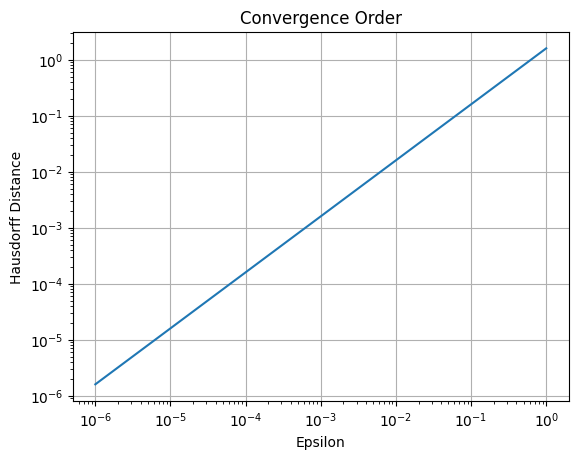

In [ ]:
import matplotlib.pyplot as plt
plt.plot(eps_list, distances)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Hausdorff Distance')
plt.title('Convergence Order')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from scipy.stats import linregress

# Take log10 of eps_list and distances for linear fit in log-log scale
log_eps = np.log10(eps_list)
log_distances = np.log10(distances)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_eps, log_distances)

print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R^2: {r_value**2:.4f}")

Slope: 1.0000, Intercept: 0.2054, R^2: 1.0000
